<a href="https://colab.research.google.com/github/prateek261019/crop-recommendation/blob/main/crop_recommendation_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import csv
dataset = "/content/drive/MyDrive/Code/adm_project/discretization/data.csv"
df = pd.read_csv(dataset, header = 0)
df['humidity']=pd.cut(df['humidity'],3,labels=['0','1','2'])
df['temperature']=pd.cut(df['temperature'],5,labels=['0','1','2','3','4'])# 0 means extremely_low ,1 means low ,2 means medium 3 means high 4 means extremely high 
df['rainfall']=pd.cut(df['rainfall'],5,labels=['0','1','2','3','4'])
df['N']=pd.cut(df['N'],5,labels=['0','1','2','3','4'])
df['P']=pd.cut(df['P'],5,labels=['0','1','2','3','4'])
df['K']=pd.cut(df['K'],5,labels=['0','1','2','3','4'])
df['ph'] = pd.cut(x=df['ph'], bins=[0, 6.97, 7.4, 14], labels=['0', '1', '2'])
df["label"] =df["label"].map({"rice": 0, "maize":1,"chickpea": 2, "kidneybeans":3,"pigeonpeas": 4, "mothbeans":5,"mungbean": 6, "blackgram":7,"lentil": 8, "pomegranate":9,"banana":10, "mango":11,"grapes": 12, "watermelon":13,"muskmelon":14, "apple":15,"orange":16, "papaya":17,"coconut":18, "cotton":19,"jute":20, "coffee":21})

df.to_csv('/content/drive/MyDrive/Code/adm_project/discretization/convert_numeric.csv',index=False)


In [ ]:
df.head()


,N,P,K,temperature,humidity,ph,rainfall,label
0,3,1,0,1,2,0,3,0
1,3,1,0,1,2,1,3,0
2,2,1,0,2,2,2,4,0
3,2,1,0,2,2,1,3,0
4,2,1,0,1,2,2,4,0


In [ ]:
PATH='/content/drive/MyDrive/Code/adm_project/discretization/convert_numeric.csv'
df = pd.read_csv(PATH)

In [ ]:
df.head(10)

,N,P,K,temperature,humidity,ph,rainfall,label
0,3,1,0,1,2,0,3,0
1,3,1,0,1,2,1,3,0
2,2,1,0,2,2,2,4,0
3,2,1,0,2,2,1,3,0
4,2,1,0,1,2,2,4,0
5,2,1,0,2,2,1,4,0
6,2,1,0,1,2,0,4,0
7,3,1,0,1,2,0,3,0
8,3,1,0,2,2,0,3,0
9,2,1,0,2,2,0,3,0


In [ ]:
df.tail(10)

,N,P,K,temperature,humidity,ph,rainfall,label
2190,3,1,0,2,1,0,2,21
2191,4,0,0,2,1,0,2,21
2192,3,0,0,2,1,2,3,21
2193,4,1,0,2,1,0,2,21
2194,3,1,0,2,1,0,2,21
2195,3,1,0,2,1,0,2,21
2196,3,0,0,2,1,0,1,21
2197,4,0,0,2,1,0,2,21
2198,4,0,0,2,1,0,1,21
2199,3,0,0,2,1,0,2,21


In [ ]:
df.size

17600

In [ ]:
df.shape

(2200, 8)

In [ ]:
df.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [ ]:
df['label'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21])

In [ ]:
df.dtypes

N              int64
P              int64
K              int64
temperature    int64
humidity       int64
ph             int64
rainfall       int64
label          int64
dtype: object

In [ ]:
df['label'].value_counts()

21    100
19    100
2     100
4     100
6     100
8     100
10    100
12    100
14    100
16    100
18    100
20    100
1     100
3     100
5     100
7     100
9     100
11    100
13    100
15    100
17    100
0     100
Name: label, dtype: int64

In [ ]:
from __future__ import print_function
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree
import warnings
warnings.filterwarnings('ignore')

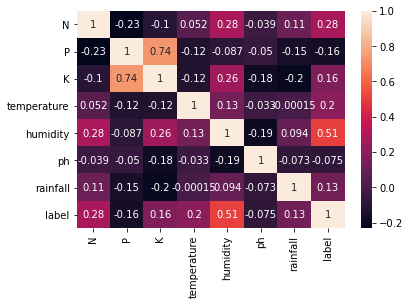

In [ ]:
sns.heatmap(df.corr(),annot=True) # A heatmap is very useful in visualizing the concentration of values between two dimensions of a matrix.

In [ ]:
features = df[['N', 'P','K','temperature', 'humidity', 'ph', 'rainfall']]
target = df['label']
labels = df['label']

In [ ]:
acc = [] # we are initialization 
model = []

In [ ]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(features,target,test_size = 0.2,random_state =2)


In [ ]:
from sklearn.tree import DecisionTreeClassifier

DecisionTree = DecisionTreeClassifier(criterion="entropy",random_state=2,max_depth=20)

DecisionTree.fit(Xtrain,Ytrain)

predicted_values = DecisionTree.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Decision Tree')
print("DecisionTrees's Accuracy is: ", x*100)

print(classification_report(Ytest,predicted_values))

DecisionTrees's Accuracy is:  85.0
              precision    recall  f1-score   support

           0       0.65      0.69      0.67        16
           1       0.95      0.86      0.90        21
           2       1.00      1.00      1.00        21
           3       0.93      1.00      0.97        14
           4       1.00      0.89      0.94        18
           5       0.70      1.00      0.83        19
           6       1.00      1.00      1.00        24
           7       0.64      0.56      0.60        16
           8       0.76      0.57      0.65        23
           9       0.65      1.00      0.79        17
          10       0.94      1.00      0.97        17
          11       0.96      1.00      0.98        26
          12       1.00      1.00      1.00        18
          13       0.39      0.73      0.51        15
          14       0.60      0.26      0.36        23
          15       1.00      1.00      1.00        13
          16       1.00      0.72      0.84   

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:

score = cross_val_score(DecisionTree, features, target,cv=10)

In [ ]:
score

array([0.88636364, 0.86363636, 0.88181818, 0.83181818, 0.87272727,
       0.86818182, 0.89545455, 0.88181818, 0.84545455, 0.85909091])

In [ ]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
DT_pkl_filename = 'DecisionTree.pkl'
# Open the file to save as pkl file
DT_Model_pkl = open(DT_pkl_filename, 'wb')
pickle.dump(DecisionTree, DT_Model_pkl)
# Close the pickle instances
DT_Model_pkl.close()

In [ ]:
from sklearn.naive_bayes import GaussianNB

NaiveBayes = GaussianNB()

NaiveBayes.fit(Xtrain,Ytrain)

predicted_values = NaiveBayes.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Naive Bayes')
print("Naive Bayes's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

Naive Bayes's Accuracy is:  0.7818181818181819
              precision    recall  f1-score   support

           0       0.65      0.69      0.67        16
           1       1.00      0.10      0.17        21
           2       1.00      1.00      1.00        21
           3       0.70      1.00      0.82        14
           4       1.00      0.39      0.56        18
           5       0.68      1.00      0.81        19
           6       0.96      1.00      0.98        24
           7       0.58      0.69      0.63        16
           8       0.93      0.57      0.70        23
           9       0.73      0.65      0.69        17
          10       0.70      0.94      0.80        17
          11       0.74      1.00      0.85        26
          12       1.00      1.00      1.00        18
          13       0.39      1.00      0.57        15
          14       0.00      0.00      0.00        23
          15       1.00      1.00      1.00        13
          16       0.81      0.90 

In [ ]:
score = cross_val_score(NaiveBayes,features,target,cv=10)
score

array([0.81818182, 0.81818182, 0.83636364, 0.80454545, 0.8       ,
       0.8       , 0.83181818, 0.82727273, 0.77727273, 0.80909091])

In [ ]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
NB_pkl_filename = 'NBClassifier.pkl'
# Open the file to save as pkl file
NB_Model_pkl = open(NB_pkl_filename, 'wb')
pickle.dump(NaiveBayes, NB_Model_pkl)
# Close the pickle instances
NB_Model_pkl.close()

In [ ]:
from sklearn.svm import SVC

SVM = SVC(gamma='auto')

SVM.fit(Xtrain,Ytrain)

predicted_values = SVM.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('SVM')
print("SVM's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

SVM's Accuracy is:  0.85
              precision    recall  f1-score   support

           0       0.67      0.75      0.71        16
           1       1.00      0.86      0.92        21
           2       1.00      1.00      1.00        21
           3       0.93      1.00      0.97        14
           4       1.00      0.89      0.94        18
           5       0.63      1.00      0.78        19
           6       1.00      1.00      1.00        24
           7       0.67      0.62      0.65        16
           8       0.92      0.52      0.67        23
           9       0.65      1.00      0.79        17
          10       0.94      1.00      0.97        17
          11       0.96      1.00      0.98        26
          12       1.00      1.00      1.00        18
          13       0.39      1.00      0.57        15
          14       0.00      0.00      0.00        23
          15       1.00      1.00      1.00        13
          16       1.00      0.72      0.84        29
  

In [ ]:
score = cross_val_score(SVM,features,target,cv=5)
score

array([0.87045455, 0.86590909, 0.87954545, 0.88636364, 0.85681818])

In [ ]:
from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression(random_state=2)

LogReg.fit(Xtrain,Ytrain)

predicted_values = LogReg.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Logistic Regression')
print("Logistic Regression's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

Logistic Regression's Accuracy is:  0.8159090909090909
              precision    recall  f1-score   support

           0       0.67      0.75      0.71        16
           1       1.00      0.81      0.89        21
           2       1.00      1.00      1.00        21
           3       1.00      1.00      1.00        14
           4       0.83      0.83      0.83        18
           5       0.68      1.00      0.81        19
           6       0.89      1.00      0.94        24
           7       0.65      0.69      0.67        16
           8       0.93      0.57      0.70        23
           9       0.52      0.65      0.58        17
          10       0.89      1.00      0.94        17
          11       0.92      0.88      0.90        26
          12       1.00      1.00      1.00        18
          13       0.38      0.93      0.54        15
          14       0.00      0.00      0.00        23
          15       1.00      1.00      1.00        13
          16       0.77   

In [ ]:
# Cross validation score (Logistic Regression)
score = cross_val_score(LogReg,features,target,cv=5)
score

array([0.86818182, 0.85227273, 0.85681818, 0.86363636, 0.83636364])

In [ ]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
LR_pkl_filename = 'LogisticRegression.pkl'
# Open the file to save as pkl file
LR_Model_pkl = open(DT_pkl_filename, 'wb')
pickle.dump(LogReg, LR_Model_pkl)
# Close the pickle instances
LR_Model_pkl.close()

In [ ]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=20, random_state=0)
RF.fit(Xtrain,Ytrain)

predicted_values = RF.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('RF')
print("RF's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

RF's Accuracy is:  0.85
              precision    recall  f1-score   support

           0       0.69      0.69      0.69        16
           1       0.95      0.86      0.90        21
           2       1.00      1.00      1.00        21
           3       0.93      1.00      0.97        14
           4       1.00      0.89      0.94        18
           5       0.70      1.00      0.83        19
           6       1.00      1.00      1.00        24
           7       0.69      0.69      0.69        16
           8       0.87      0.57      0.68        23
           9       0.65      1.00      0.79        17
          10       0.94      1.00      0.97        17
          11       0.96      1.00      0.98        26
          12       1.00      1.00      1.00        18
          13       0.33      0.53      0.41        15
          14       0.50      0.30      0.38        23
          15       1.00      1.00      1.00        13
          16       1.00      0.72      0.84        29
   

In [ ]:
score = cross_val_score(RF,features,target,cv=5)
score

array([0.86818182, 0.87272727, 0.85909091, 0.86136364, 0.85454545])

In [ ]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
RF_pkl_filename = 'RandomForest.pkl'
# Open the file to save as pkl file
RF_Model_pkl = open(RF_pkl_filename, 'wb')
pickle.dump(RF, RF_Model_pkl)
# Close the pickle instances
RF_Model_pkl.close()

In [ ]:
import xgboost as xgb
XB = xgb.XGBClassifier()
XB.fit(Xtrain,Ytrain)

predicted_values = XB.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('XGBoost')
print("XGBoost's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

XGBoost's Accuracy is:  0.8590909090909091
              precision    recall  f1-score   support

           0       0.65      0.69      0.67        16
           1       1.00      0.86      0.92        21
           2       1.00      1.00      1.00        21
           3       0.93      1.00      0.97        14
           4       1.00      0.89      0.94        18
           5       0.70      1.00      0.83        19
           6       1.00      1.00      1.00        24
           7       0.71      0.75      0.73        16
           8       0.93      0.57      0.70        23
           9       0.65      1.00      0.79        17
          10       0.94      1.00      0.97        17
          11       0.96      1.00      0.98        26
          12       1.00      1.00      1.00        18
          13       0.39      0.73      0.51        15
          14       0.60      0.26      0.36        23
          15       1.00      1.00      1.00        13
          16       1.00      0.72     

In [ ]:
score = cross_val_score(XB,features,target,cv=5)
score

array([0.87272727, 0.86818182, 0.875     , 0.88409091, 0.85681818])

In [ ]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
XB_pkl_filename = 'XGBoost.pkl'
# Open the file to save as pkl file
XB_Model_pkl = open(XB_pkl_filename, 'wb')
pickle.dump(XB, XB_Model_pkl)
# Close the pickle instances
XB_Model_pkl.close()

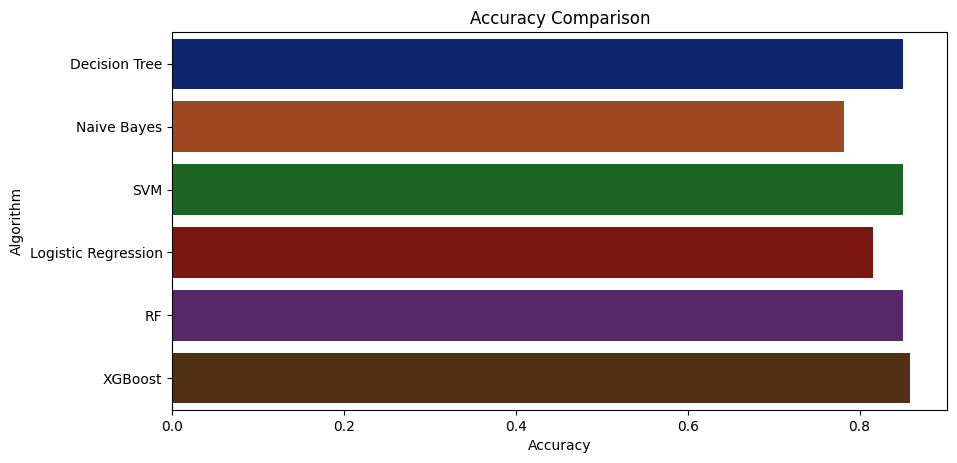

In [ ]:
plt.figure(figsize=[10,5],dpi = 100)
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')
sns.barplot(x = acc,y = model,palette='dark')

In [ ]:
accuracy_models = dict(zip(model, acc))
for k, v in accuracy_models.items():
    print (k, '-->', v)

Decision Tree --> 0.85
Naive Bayes --> 0.7818181818181819
SVM --> 0.85
Logistic Regression --> 0.8159090909090909
RF --> 0.85
XGBoost --> 0.8590909090909091


In [ ]:
data = np.array([[3	,1	,0	,2	,2	,0	,3]])  # we will use inbuilt func to predict the crop
prediction = RF.predict(data)
print(prediction)


if prediction==0:
  print("@@@@@@@@  you should grow rice @@@@@@@@")
if prediction==1:
  print("@@@@@@@@  you should grow maize @@@@@@@@")
if prediction==2:
  print("@@@@@@@@  you should grow chickpea @@@@@@@@")
if prediction==3:
  print("@@@@@@@@  you should grow kidneybeans @@@@@@@@")
if prediction==4:
  print("@@@@@@@@  you should grow pigeonpeas @@@@@@@@")
if prediction==5:
  print("@@@@@@@@  you should grow mothbeans @@@@@@@@")
if prediction==6:
  print("@@@@@@@@  you should grow mungbean @@@@@@@@")
if prediction==7:
  print("@@@@@@@@  you should grow blackgram @@@@@@@@")
if prediction==8:
  print("@@@@@@@@  you should grow lentil @@@@@@@@")
if prediction==9:
  print("@@@@@@@@  you should grow pomegranate @@@@@@@@")
if prediction==10:
  print("@@@@@@@@  you should grow banana @@@@@@@@")
if prediction==11:
  print("@@@@@@@@  you should grow mango @@@@@@@@")
if prediction==12:
  print("@@@@@@@@  you should grow grapes @@@@@@@@")
if prediction==13:
  print("@@@@@@@@  you should grow watermelon @@@@@@@@")
if prediction==14:
  print("@@@@@@@@  you should grow muskmelon @@@@@@@@")
if prediction==15:
  print("@@@@@@@@  you should grow apple @@@@@@@@")
if prediction==16:
  print("@@@@@@@@  you should grow orange @@@@@@@@")
if prediction==17:
  print("@@@@@@@@  you should grow papaya @@@@@@@@")
if prediction==18:
  print("@@@@@@@@  you should grow coconut @@@@@@@@")
if prediction==19:
  print("@@@@@@@@  you should grow cotton @@@@@@@@")
if prediction==20:
  print("@@@@@@@@  you should grow jute @@@@@@@@")
if prediction==21:
  print("@@@@@@@@  you should grow coffee @@@@@@@@")


[0]
@@@@@@@@  you should grow rice @@@@@@@@


In [ ]:
#DecisionTree
data = np.array([[0	,2	,1	,1	,0	,0	,1]])  # we will use inbuilt func to predict the crop
prediction = DecisionTree.predict(data)
print(prediction)

if prediction==0:
  print("@@@@@@@@  you should grow rice @@@@@@@@")
if prediction==1:
  print("@@@@@@@@  you should grow maize @@@@@@@@")
if prediction==2:
  print("@@@@@@@@  you should grow chickpea @@@@@@@@")
if prediction==3:
  print("@@@@@@@@  you should grow kidneybeans @@@@@@@@")
if prediction==4:
  print("@@@@@@@@  you should grow pigeonpeas @@@@@@@@")
if prediction==5:
  print("@@@@@@@@  you should grow mothbeans @@@@@@@@")
if prediction==6:
  print("@@@@@@@@  you should grow mungbean @@@@@@@@")
if prediction==7:
  print("@@@@@@@@  you should grow blackgram @@@@@@@@")
if prediction==8:
  print("@@@@@@@@  you should grow lentil @@@@@@@@")
if prediction==9:
  print("@@@@@@@@  you should grow pomegranate @@@@@@@@")
if prediction==10:
  print("@@@@@@@@  you should grow banana @@@@@@@@")
if prediction==11:
  print("@@@@@@@@  you should grow mango @@@@@@@@")
if prediction==12:
  print("@@@@@@@@  you should grow grapes @@@@@@@@")
if prediction==13:
  print("@@@@@@@@  you should grow watermelon @@@@@@@@")
if prediction==14:
  print("@@@@@@@@  you should grow muskmelon @@@@@@@@")
if prediction==15:
  print("@@@@@@@@  you should grow apple @@@@@@@@")
if prediction==16:
  print("@@@@@@@@  you should grow orange @@@@@@@@")
if prediction==17:
  print("@@@@@@@@  you should grow papaya @@@@@@@@")
if prediction==18:
  print("@@@@@@@@  you should grow coconut @@@@@@@@")
if prediction==19:
  print("@@@@@@@@  you should grow cotton @@@@@@@@")
if prediction==20:
  print("@@@@@@@@  you should grow jute @@@@@@@@")
if prediction==21:
  print("@@@@@@@@  you should grow coffee @@@@@@@@")

[2]
@@@@@@@@  you should grow chickpea @@@@@@@@


In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [ ]:
#col_names = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label']
# load dataset
ld = pd.read_csv("/content/drive/MyDrive/Code/adm_project/discretization/convert_numeric.csv")

In [ ]:
ld.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,3,1,0,1,2,0,3,0
1,3,1,0,1,2,1,3,0
2,2,1,0,2,2,2,4,0
3,2,1,0,2,2,1,3,0
4,2,1,0,1,2,2,4,0


In [ ]:
#split dataset in features and target variable
feature_cols = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']
X = ld[feature_cols] # Features
y = ld.label # Target variable
print(feature_cols)


['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']


In [ ]:
print(ld.label.unique())

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]


In [ ]:
print(y.unique())

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]


In [ ]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [ ]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [ ]:
 #Model Accuracy, how often is the classifier correct?

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8621212121212121


In [ ]:
pip install graphviz

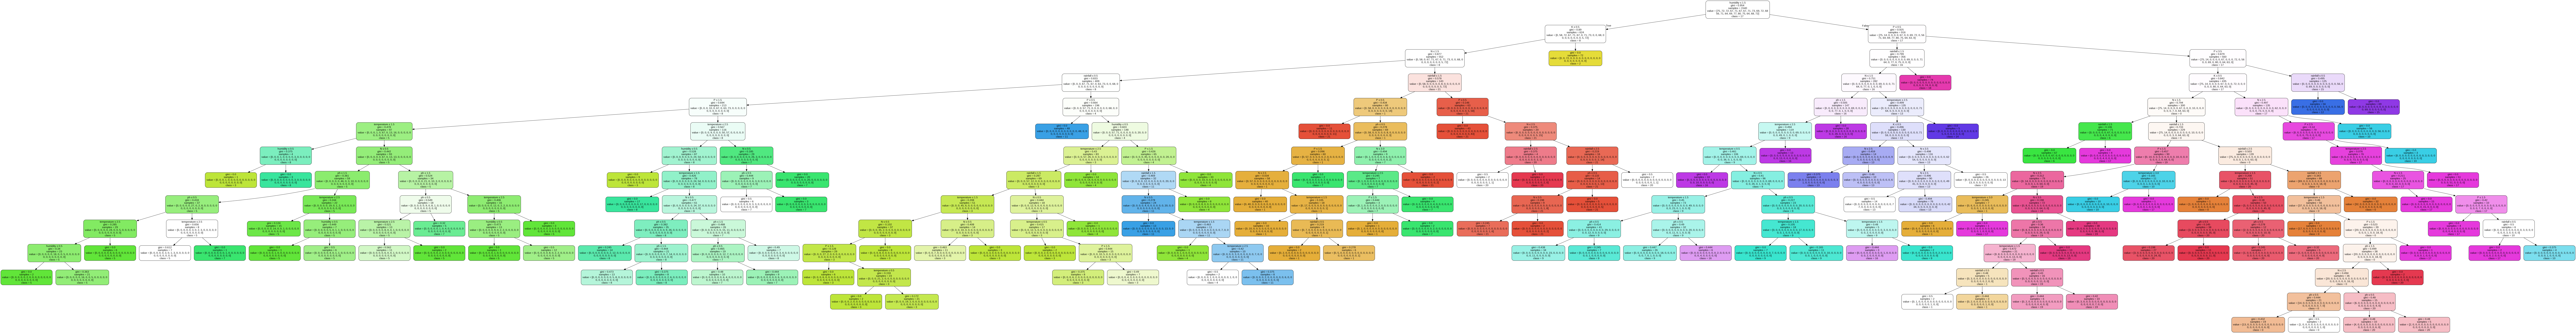

In [ ]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols, class_names=['0','1', '2',  '3', '4', '5', '6',  '7',  '8',  '9', '10', '11', '12', '13', '14', '15', '16',
       '17', '18', '19', '20', '21'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('CROP_RECOMMENDATION.png')
Image(graph.create_png())


In [ ]:
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree

# Prepare the data data
X = ld[feature_cols] # Features
y = ld.label # Target variable

# Fit the classifier with max_depth=3
clf = DecisionTreeClassifier(max_depth=20, random_state=1234)
model = clf.fit(X, y)
print(X)

      N  P  K  temperature  humidity  ph  rainfall
0     3  1  0            1         2   0         3
1     3  1  0            1         2   1         3
2     2  1  0            2         2   2         4
3     2  1  0            2         2   1         3
4     2  1  0            1         2   2         4
...  .. .. ..          ...       ...  ..       ...
2195  3  1  0            2         1   0         2
2196  3  0  0            2         1   0         1
2197  4  0  0            2         1   0         2
2198  4  0  0            2         1   0         1
2199  3  0  0            2         1   0         2

[2200 rows x 7 columns]


In [ ]:
# get the text representation
text_representation = tree.export_text(clf)
print(text_representation)

|--- feature_4 <= 1.50
|   |--- feature_2 <= 0.50
|   |   |--- feature_0 <= 1.50
|   |   |   |--- feature_6 <= 0.50
|   |   |   |   |--- feature_1 <= 1.50
|   |   |   |   |   |--- feature_3 <= 1.50
|   |   |   |   |   |   |--- feature_4 <= 0.50
|   |   |   |   |   |   |   |--- class: 3
|   |   |   |   |   |   |--- feature_4 >  0.50
|   |   |   |   |   |   |   |--- class: 8
|   |   |   |   |   |--- feature_3 >  1.50
|   |   |   |   |   |   |--- feature_0 <= 0.50
|   |   |   |   |   |   |   |--- feature_5 <= 1.50
|   |   |   |   |   |   |   |   |--- feature_5 <= 0.50
|   |   |   |   |   |   |   |   |   |--- feature_3 <= 2.50
|   |   |   |   |   |   |   |   |   |   |--- feature_4 <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |--- class: 5
|   |   |   |   |   |   |   |   |   |   |--- feature_4 >  0.50
|   |   |   |   |   |   |   |   |   |   |   |--- class: 5
|   |   |   |   |   |   |   |   |   |--- feature_3 >  2.50
|   |   |   |   |   |   |   |   |   |   |--- class: 5
|   |   |   | 

In [ ]:
text_representation = tree.export_text(clf,feature_names=feature_cols)
print(text_representation)

|--- humidity <= 1.50
|   |--- K <= 0.50
|   |   |--- N <= 1.50
|   |   |   |--- rainfall <= 0.50
|   |   |   |   |--- P <= 1.50
|   |   |   |   |   |--- temperature <= 1.50
|   |   |   |   |   |   |--- humidity <= 0.50
|   |   |   |   |   |   |   |--- class: 3
|   |   |   |   |   |   |--- humidity >  0.50
|   |   |   |   |   |   |   |--- class: 8
|   |   |   |   |   |--- temperature >  1.50
|   |   |   |   |   |   |--- N <= 0.50
|   |   |   |   |   |   |   |--- ph <= 1.50
|   |   |   |   |   |   |   |   |--- ph <= 0.50
|   |   |   |   |   |   |   |   |   |--- temperature <= 2.50
|   |   |   |   |   |   |   |   |   |   |--- humidity <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |--- class: 5
|   |   |   |   |   |   |   |   |   |   |--- humidity >  0.50
|   |   |   |   |   |   |   |   |   |   |   |--- class: 5
|   |   |   |   |   |   |   |   |   |--- temperature >  2.50
|   |   |   |   |   |   |   |   |   |   |--- class: 5
|   |   |   |   |   |   |   |   |--- ph >  0.50
|   |   | 

In [ ]:
from sklearn.tree import _tree

def tree_to_code(tree, feature_names):
    tree_ = tree.tree_
    feature_name = [
        feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"
        for i in tree_.feature
    ]
    feature_names = [f.replace(" ", "_")[:-5] for f in feature_names]
    print(predict().format(", ".join(feature_names)))

    def recurse(node, depth):
        indent = "    " * depth
        if tree_.feature[node] != _tree.TREE_UNDEFINED:
            name = feature_name[node]
            threshold = tree_.threshold[node]
            print("{}if {} <= {}:".format(indent, name, np.round(threshold,2)))
            recurse(tree_.children_left[node], depth + 1)
            print("{}else:  # if {} > {}".format(indent, name, np.round(threshold,2)))
            recurse(tree_.children_right[node], depth + 1)

        else:
            print("{}return {}".format(indent, tree_.value[node]))

    recurse(0, 1)

In [ ]:
#DEFINE_"2.50" = HIGH
def predict(N,P, K, temperature,humidity,ph,rainfall):
  print("jdfdga")
 
  label=100 
  if K <= 2.50:
    if humidity <= 1.50:
      if K <= 0.50:
        if N <= 1.50:
          if rainfall <= 0.50:
            if P <= 1.50:
              if temperature <= 1.50:
                if humidity <= 0.50:
                  label =  3
                elif humidity >  0.50:
                  label = 8
              elif temperature >  1.50:
                if N <= 0.50:
                  if ph <= 1.50:
                    if temperature <= 2.50:
                      if humidity <= 0.50:
                        label = 5
                      elif humidity >  0.50:
                        print("truncated branch of depth 2")
                    elif temperature >  2.50:
                     if ph <= 0.50:
                       label = 5
                     elif ph >  0.50:
                        label = 7
                  elif ph >  1.50:
                    if temperature <= 2.50:
                      label = 5
                  elif temperature >  2.50:
                    if humidity <= 0.50:
                      label = 5
                    elif humidity >  0.50:
                      label = 5
              elif N >  0.50:
                if humidity <= 0.50:
                  label = 5
                elif humidity >  0.50:
                  if ph <= 1.50:
                    if ph <= 0.50:
                      print("truncated branch of depth 2")
                    elif ph >  0.50:
                      label = 7
                  elif ph >  1.50:
                    if temperature <= 2.50:
                      label = 5
                    elif temperature >  2.50:
                      label = 5
          elif P >  1.50:
            if humidity <= 0.50:
              label = 3
            elif humidity >  0.50:
              if temperature <= 2.50:
                if N <= 0.50:
                  if temperature <= 1.50:
                    label = 8
                  elif temperature >  1.50:
                    if ph <= 0.50:
                      label = 8
                    elif ph >  0.50:
                      print("truncated branch of depth 2")
                elif N >  0.50:
                  if temperature <= 1.50:
                    label = 8
                  elif temperature >  1.50:
                    if ph <= 1.50:
                     print(" truncated branch of depth 2")
                    elif ph >  1.50:
                      label = 7
              elif temperature >  2.50:
                if N <= 0.50:
                  if ph <= 0.50:
                    label = 7
                  elif ph >  0.50:
                    label = 7
                elif N >  0.50:
                  label = 7
        elif rainfall >  0.50:
          if humidity <= 0.50:
            if temperature <= 2.50:
              if rainfall <= 2.50:
                if temperature <= 1.50:
                  if rainfall <= 1.50:
                    if P <= 1.50:
                      label = 3
                    elif P >  1.50:
                      print("truncated branch of depth 3")
                  elif rainfall >  1.50:
                    if temperature <= 0.50:
                      label = 3
                    elif temperature >  0.50:
                      print("truncated branch of depth 3")
                elif temperature >  1.50:
                  if N <= 0.50:
                    if rainfall <= 1.50:
                      print("truncated branch of depth 2")
                    elif rainfall >  1.50:
                      label = 3
                  elif N >  0.50:
                    if P <= 1.50:
                      label = 3
                    elif P >  1.50:
                      print("truncated branch of depth 2")
              elif rainfall >  2.50:
                label = 4
            elif temperature >  2.50:
              label = 4
          elif humidity >  0.50:
            if P <= 1.50:
              if rainfall <= 1.50:
                if ph <= 0.50:
                  if temperature <= 1.50:
                   label= 4
                  elif temperature >  1.50:
                    if P <= 0.50:
                      label = 11
                    elif P >  0.50:
                      print("truncated branch of depth 3")
                elif ph >  0.50:
                  label = 4
              elif rainfall >  1.50:
                label = 4
            elif P >  1.50:
              label = 4
      elif N >  1.50:
        if rainfall <= 1.50:
          if P <= 0.50:
            label = 21
          elif P >  0.50:
            if ph <= 0.50:
              if P <= 1.50:
                if N <= 3.50:
                  if temperature <= 1.50:
                    label= 1
                  elif temperature >  1.50:
                    if N <= 2.50:
                      print("truncated branch of depth 2")
                    elif N >  2.50:
                      print("truncated branch of depth 2")
                elif N >  3.50:
                  label = 21
              elif P >  1.50:
                  label = 7
            elif ph >  0.50:
              if N <= 3.00:
                if temperature <= 2.50:
                  if P <= 1.50:
                    if ph <= 1.50:
                      label = 1
                    elif ph >  1.50:
                      label = 7
                  elif P >  1.50:
                    label = 7
                elif temperature >  2.50:
                  label = 7
              elif N >  3.00:
                label = 21
        elif rainfall >  1.50:
          if P <= 0.50:
            label = 21
          elif P >  0.50:
            if rainfall <= 2.50:
              if N <= 2.50:
                if ph <= 0.50:
                  label = 21
                elif ph >  0.50:
                  label = 20
              elif N >  2.50:
                if ph <= 0.50:
                  if N <= 3.50:
                    label = 21
                  elif N >  3.50:
                    label = 21
                elif ph >  0.50:
                  label = 21
            elif rainfall >  2.50:
              if ph <= 0.50:
                label = 20
              elif ph >  0.50:
                label = 20
    elif K >  0.50:
      label = 2
  elif humidity >  1.50:
    if P <= 0.50:
      if N <= 1.50:
        if rainfall <= 1.50:
          if ph <= 1.50:
            if temperature <= 2.50:
              if temperature <= 0.50:
                label = 16
              elif temperature >  0.50:
                if N <= 0.50:
                  if temperature <= 1.50:
                    if ph <= 0.50:
                     label= 9
                    elif ph >  0.50:
                      label = 9
                  elif temperature >  1.50:
                    if ph <= 0.50:
                      label= 9
                    elif ph >  0.50:
                      label= 16
                elif N >  0.50:
                  if ph <= 0.50:
                    if temperature <= 1.50:
                      label = 9
                    elif temperature >  1.50:
                     label = 9
                  elif ph >  0.50:
                    if temperature <= 1.50:
                      label = 9
                    elif temperature >  1.50:
                      label= 9
            elif temperature >  2.50:
              label = 16
          elif ph >  1.50:
            label= 16
        elif rainfall >  1.50:
          label = 18
      elif N >  1.50:
        if temperature <= 2.50:
          if N <= 3.50:
            if N <= 2.50:
              if K <= 0.50:
               label= 13
              elif K >  0.50:
                label = 13
            elif N >  2.50:
              if K <= 0.50:
                label = 13
              elif K >  0.50:
                label = 13
          elif N >  3.50:
            if K <= 0.50:
              label = 13
            elif K >  0.50:
              label = 14
        elif temperature >  2.50:
          label = 14
    elif P >  0.50:
      if K <= 0.50:
        if N <= 1.50:
          if rainfall <= 1.00:
            label = 6
          elif rainfall >  1.00:
            label = 17
        elif N >  1.50:
          if rainfall <= 1.50:
            if P <= 1.50:
              if N <= 2.50:
                if temperature <= 3.00:
                  label = 1
                elif temperature >  3.00:
                  label = 17
              elif N >  2.50:
                if N <= 3.50:
                  if ph <= 0.50:
                    if temperature <= 1.50:
                      print("truncated branch of depth 2")
                    elif temperature >  1.50:
                      print("truncated branch of depth 2")
                  elif ph >  0.50:
                    label = 19
                elif N >  3.50:
                  label = 19
            elif P >  1.50:
              if rainfall <= 0.50:
                label = 17
              elif rainfall >  0.50:
                label = 10
          elif rainfall >  1.50:
            if rainfall <= 2.50:
              if temperature <= 1.50:
                label = 0
              elif temperature >  1.50:
                if N <= 2.50:
                  if ph <= 0.50:
                    label = 20
                  elif ph >  0.50:
                    if ph <= 1.50:
                      label = 20
                    elif ph >  1.50:
                      label = 20
                elif N >  2.50:
                  if ph <= 1.50:
                    if ph <= 0.50:
                      label = 20
                    elif ph >  0.50:
                      label = 20
                  elif ph >  1.50:
                    label = 20
            elif rainfall >  2.50:
              if rainfall <= 3.50:
                if temperature <= 1.50:
                  label = 0
                elif temperature >  1.50:
                  if P <= 1.50:
                    if N <= 2.50:
                      print("truncated branch of depth 3")
                    elif N >  2.50:
                      print("truncated branch of depth 3")
                  elif P >  1.50:
                    label = 17
              elif rainfall >  3.50:
                label = 0
      elif K >  0.50:
        if N <= 2.50:
          if P <= 2.50:
            if temperature <= 2.50:
              if N <= 1.50:
                label= 17
              elif N >  1.50:
                if P <= 1.50:
                  label = 17
                elif P >  1.50:
                  if rainfall <= 0.50:
                    label = 17
                  elif rainfall >  0.50:
                    label = 10
            elif temperature >  2.50:
              label = 17
          elif P >  2.50:
           label=10
        elif N >  2.50:
          label = 10
  elif K >  2.50:
    if rainfall <= 0.50:
      label = 12
    elif rainfall >  0.50:
      label = 15
  return label

In [ ]:
def get_rules(tree,feature_names,label):
    tree_ = tree.tree_
    feature_name = [
        feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"
        for i in tree_.feature
    ]

    paths = []
    path = []
    
    def recurse(node, path, paths):
        
        if tree_.feature[node] != _tree.TREE_UNDEFINED:
            name = feature_name[node]
            threshold = tree_.threshold[node]
            p1, p2 = list(path), list(path)
            p1 += [f"({name} <= {np.round(threshold, 3)})"]
            recurse(tree_.children_left[node], p1, paths)
            p2 += [f"({name} > {np.round(threshold, 3)})"]
            recurse(tree_.children_right[node], p2, paths)
        else:
            path += [(tree_.value[node], tree_.n_node_samples[node])]
            paths += [path]
            
    recurse(0, path, paths)

    # sort by samples count
    samples_count = [p[-1][1] for p in paths]
    ii = list(np.argsort(samples_count))
    paths = [paths[i] for i in reversed(ii)]
    
    rules = []
    for path in paths:
        if path[-1][1] > 20:
          rule = "if "
          
          for p in path[:-1]:
              if rule != "if ":
                  rule += " and "
              rule += str(p)
          rule += " then "
          if ld.label is None:
              rule += "response: "+str(np.round(path[-1][0][0][0],3))
          else:
              classes = path[-1][0][0]
              l = np.argmax(classes)
              rule += f"class: {label[l]}"
              #(proba: {np.round(100.0*classes[l]/np.sum(classes),2)}%)"

          rule += f" | based on {path[-1][1]:,} samples"
          rules += [rule]
        
    return rules

In [ ]:
rules = get_rules(clf,feature_cols,y.unique())
for r in rules:
    print(r)

if (humidity > 1.5) and (P <= 0.5) and (rainfall <= 1.5) and (N > 1.5) and (temperature <= 2.5) and (K > 0.5) and (N <= 3.5) and (N > 2.5) then class: 13 | based on 76 samples
if (humidity > 1.5) and (P <= 0.5) and (rainfall > 1.5) then class: 18 | based on 74 samples
if (humidity <= 1.5) and (K > 0.5) then class: 2 | based on 72 samples
if (humidity > 1.5) and (P > 0.5) and (P > 3.5) and (rainfall > 0.5) then class: 15 | based on 69 samples
if (humidity > 1.5) and (P > 0.5) and (P <= 3.5) and (K <= 0.5) and (N <= 1.5) and (rainfall <= 1.5) then class: 6 | based on 67 samples
if (humidity > 1.5) and (P > 0.5) and (P <= 3.5) and (K > 0.5) and (N > 2.5) then class: 10 | based on 56 samples
if (humidity > 1.5) and (P > 0.5) and (P > 3.5) and (rainfall <= 0.5) then class: 12 | based on 56 samples
if (humidity > 1.5) and (P > 0.5) and (P <= 3.5) and (K > 0.5) and (N <= 2.5) and (P <= 2.5) and (temperature > 2.5) then class: 17 | based on 51 samples
if (humidity <= 1.5) and (K <= 0.5) and (N

In [ ]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

In [ ]:
pip install scikit-fuzzy


In [ ]:
N = np.arange(0, 140,1) 
P = np.arange(0, 145,1) # location of house
K = np.arange(0,205,1) # Asset $ x10^3
temperature= np.arange(0,44,0.01) # income $ x10^3
humidity= np.arange(0, 100, .01)
ph=np.arange(0,10,0.01)
rainfall=np.arange(0,300,0.01)


In [ ]:
N_very_low = fuzz.trapmf(N, [0,0,10,20 ])#<20 0.5
N_low = fuzz.trapmf(N,[16,25,30,40])
N_medium = fuzz.trapmf(N, [35,45,55,75])
N_high = fuzz.trapmf(N, [67,80,92,110])
N_extremely_high= fuzz.trapmf(N, [103,120,140,140])

P_very_low = fuzz.trapmf(P, [0,0,10,20 ])
P_low = fuzz.trapmf(P,[16,25,30,40])
P_medium = fuzz.trapmf(P, [35,45,55,75])
P_high = fuzz.trapmf(P, [67,80,92,110])
P_extremely_high= fuzz.trapmf(P, [103,118,145,145])


K_very_low = fuzz.trapmf(K, [0,0,20,40 ])
K_low = fuzz.trapmf(K,[30,50,65,75])
K_medium = fuzz.trapmf(K, [64,80,92,111])
K_high = fuzz.trapmf(K, [102,120,145,165])
K_extremely_high= fuzz.trapmf(K, [155,180,205,205])

temperature_very_low = fuzz.trapmf(temperature, [0,0,5,8])
temperature_low = fuzz.trapmf(temperature,[7,10,14,18])
temperature_medium = fuzz.trapmf(temperature, [16,21,26,29])
temperature_high = fuzz.trapmf(temperature, [25,33,36,40])
temperature_extremely_high= fuzz.trapmf(temperature, [37,43,44,44])

humidity_low = fuzz.trapmf(humidity, [0,0,22,30])
humidity_medium = fuzz.trapmf(humidity,[26,33,48,60])
humidity_high = fuzz.trapmf(humidity, [55,72,100,100])


ph_low = fuzz.trapmf(ph, [0,0,2,4])
ph_medium = fuzz.trapmf(ph,[3,4.5,5.5,8])
ph_high = fuzz.trapmf(ph, [7.5,9,10,10])


rainfall_very_low = fuzz.trapmf(rainfall, [0,0,10,30 ])
rainfall_low = fuzz.trapmf(rainfall,[25,38,50,75])
rainfall_medium = fuzz.trapmf(rainfall, [68,90,130,150])
rainfall_high = fuzz.trapmf(rainfall, [135,155,190,220])
rainfall_extremely_high= fuzz.trapmf(rainfall, [210,235,300,300])










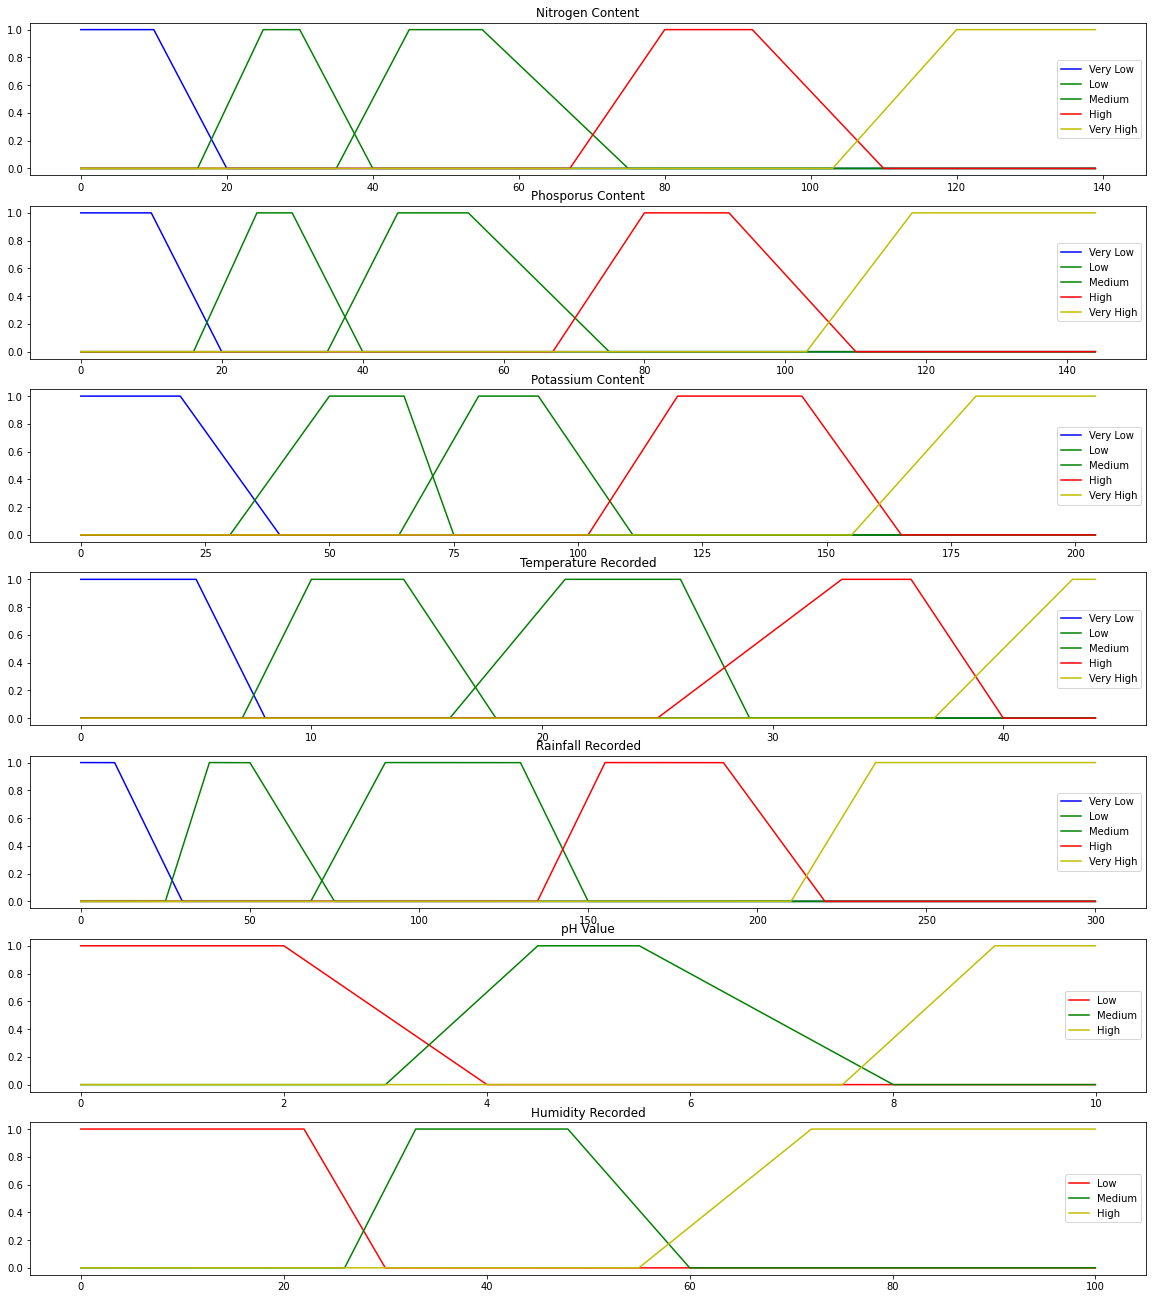

In [ ]:
plt.rcParams["figure.figsize"] = 20, 50

plt.subplot(15,1,1), plt.plot(N,N_very_low, 'b', linewidth=1.5, label='Very Low')
plt.subplot(15,1,1), plt.plot(N,N_low, 'g', linewidth=1.5, label='Low')
plt.subplot(15,1,1), plt.plot(N,N_medium, 'g', linewidth=1.5, label='Medium')
plt.subplot(15,1,1), plt.plot(N,N_high, 'r', linewidth=1.5, label='High')
plt.subplot(15,1,1), plt.plot(N,N_extremely_high ,'y', linewidth=1.5, label='Very High'),plt.title("Nitrogen Content")
plt.legend()



plt.subplot(15,1,2), plt.plot(P,P_very_low, 'b', linewidth=1.5, label='Very Low')
plt.subplot(15,1,2), plt.plot(P,P_low, 'g', linewidth=1.5, label='Low')
plt.subplot(15,1,2), plt.plot(P,P_medium, 'g', linewidth=1.5, label='Medium')
plt.subplot(15,1,2), plt.plot(P,P_high, 'r', linewidth=1.5, label='High')
plt.subplot(15,1,2), plt.plot(P,P_extremely_high ,'y', linewidth=1.5, label='Very High'),plt.title("Phosporus Content")
plt.legend()

plt.subplot(15,1,3), plt.plot(K,K_very_low, 'b', linewidth=1.5, label='Very Low')
plt.subplot(15,1,3), plt.plot(K,K_low,  'g', linewidth=1.5, label='Low')
plt.subplot(15,1,3), plt.plot(K,K_medium, 'g', linewidth=1.5, label='Medium')
plt.subplot(15,1,3), plt.plot(K,K_high, 'r', linewidth=1.5, label='High')
plt.subplot(15,1,3), plt.plot(K,K_extremely_high ,'y', linewidth=1.5, label='Very High'),plt.title("Potassium Content")
plt.legend()

plt.subplot(15,1,4), plt.plot(temperature,temperature_very_low, 'b', linewidth=1.5, label='Very Low')
plt.subplot(15,1,4), plt.plot(temperature,temperature_low, 'g', linewidth=1.5, label='Low')
plt.subplot(15,1,4), plt.plot(temperature,temperature_medium, 'g', linewidth=1.5, label='Medium')
plt.subplot(15,1,4), plt.plot(temperature,temperature_high, 'r', linewidth=1.5, label='High')
plt.subplot(15,1,4), plt.plot(temperature,temperature_extremely_high ,'y', linewidth=1.5, label='Very High'),plt.title("Temperature Recorded")
plt.legend()

plt.subplot(15,1,5), plt.plot(rainfall,rainfall_very_low, 'b', linewidth=1.5, label='Very Low')
plt.subplot(15,1,5), plt.plot(rainfall,rainfall_low,  'g', linewidth=1.5, label='Low')
plt.subplot(15,1,5), plt.plot(rainfall,rainfall_medium, 'g', linewidth=1.5, label='Medium')
plt.subplot(15,1,5), plt.plot(rainfall,rainfall_high, 'r', linewidth=1.5, label='High')
plt.subplot(15,1,5), plt.plot(rainfall,rainfall_extremely_high, 'y', linewidth=1.5, label='Very High'),plt.title("Rainfall Recorded")
plt.legend()


plt.subplot(15,1,6), plt.plot(ph,ph_low,'r', linewidth=1.5, label='Low')
plt.subplot(15,1,6), plt.plot(ph,ph_medium, 'g', linewidth=1.5, label='Medium')
plt.subplot(15,1,6), plt.plot(ph,ph_high, 'y', linewidth=1.5, label='High'),plt.title("pH Value")
plt.legend()


plt.subplot(15,1,7), plt.plot(humidity,humidity_low, 'r', linewidth=1.5, label='Low')
plt.subplot(15,1,7), plt.plot(humidity,humidity_medium, 'g', linewidth=1.5, label='Medium')
plt.subplot(15,1,7), plt.plot(humidity,humidity_high, 'y', linewidth=1.5, label='High'),plt.title("Humidity Recorded")
plt.legend()


plt.show()

In [ ]:
label = np.arange(0, 21, 1) 

In [ ]:
def and_rule3(x, y, z):
    rule = np.fmin(x, y)
    act = np.fmin(rule, z)
    return act

def and_rule7(a,b,c,d,e,f,g):
    l=[a,b,c,d,e,f,g]
    l.sort()
    return l[0]

def and_rule6(a,b,c,d,e,f):
    l=[a,b,c,d,e,f]
    l.sort()
    return l[0]


def and_rule10(a,b,c,d,e,f,g,h,i,j):
    l=[a,b,c,d,e,f,g,h,i,j]
    l.sort()
    return l[0]

def and_rule12(a,b,c,d,e,f,g,h,i,j,k,l):
    l=[a,b,c,d,e,f,g,h,i,j,k,l]
    l.sort()
    return l[0]

def and_rule2(a,b):
    l=[a,b]
    l.sort()
    return l[0]

def or_rule2(a,b):
    l=[a,b]
    l.sort()
    return l[1]





In [ ]:
def apply_crop_rules(N_value,P_value,K_value,temperature_value,humidity_value,ph_value,rainfall_value, verbose=0):
    # Nitrogen
    N_level_verylow = fuzz.interp_membership(N, N_very_low, N_value)
    N_level_low = fuzz.interp_membership(N, N_low, N_value)
    N_level_medium = fuzz.interp_membership(N, N_medium, N_value)
    N_level_high = fuzz.interp_membership(N, N_high, N_value)
    N_level_extremely_high = fuzz.interp_membership(N, N_extremely_high, N_value)

    # Phosphorus
    P_level_verylow = fuzz.interp_membership(P, P_very_low, P_value)
    P_level_low = fuzz.interp_membership(P, P_low, P_value)
    P_level_medium = fuzz.interp_membership(P, P_medium, P_value)
    P_level_high = fuzz.interp_membership(P, P_high, P_value)
    P_level_extremely_high = fuzz.interp_membership(P, P_extremely_high, P_value)

    #potasium
    K_level_verylow = fuzz.interp_membership(K, K_very_low, K_value)
    K_level_low = fuzz.interp_membership(K, K_low, K_value)
    K_level_medium = fuzz.interp_membership(K, K_medium, K_value)
    K_level_high = fuzz.interp_membership(K, K_high, K_value)
    K_level_extremely_high = fuzz.interp_membership(K, K_extremely_high, K_value)

    #temperature
    temperature_level_verylow = fuzz.interp_membership(temperature, temperature_very_low, temperature_value)
    temperature_level_low = fuzz.interp_membership(temperature, temperature_low, temperature_value)
    temperature_level_medium = fuzz.interp_membership(temperature, temperature_medium, temperature_value)
    temperature_level_high = fuzz.interp_membership(temperature, temperature_high, temperature_value)
    temperature_level_extremely_high = fuzz.interp_membership(temperature, temperature_extremely_high, temperature_value)

    #humidity
    humidity_level_low = fuzz.interp_membership(humidity, humidity_low, humidity_value)
    humidity_level_medium = fuzz.interp_membership(humidity, humidity_medium, humidity_value)
    humidity_level_high = fuzz.interp_membership(humidity, humidity_high, humidity_value)

    #ph
    ph_level_low = fuzz.interp_membership(ph, ph_low, ph_value)
    ph_level_medium = fuzz.interp_membership(ph, ph_medium, ph_value)
    ph_level_high = fuzz.interp_membership(ph,ph_high, ph_value)

    #rainfall

    rainfall_level_verylow = fuzz.interp_membership(rainfall, rainfall_very_low, rainfall_value)
    rainfall_level_low = fuzz.interp_membership(rainfall, rainfall_low, rainfall_value)
    rainfall_level_medium = fuzz.interp_membership(rainfall, rainfall_medium, rainfall_value)
    rainfall_level_high = fuzz.interp_membership(rainfall, rainfall_high, rainfall_value)
    rainfall_level_extremely_high = fuzz.interp_membership(rainfall, rainfall_extremely_high, rainfall_value)


    c13=and_rule7(K_level_medium,humidity_level_medium,P_level_verylow,N_level_medium,temperature_level_medium,N_level_high,K_level_low)
    c15=and_rule2(K_level_high,rainfall_level_low)
    c6=and_rule6(K_level_medium,humidity_level_medium,P_level_low,K_level_verylow,N_level_low,rainfall_level_low)
    c2=and_rule3(K_level_medium,humidity_level_low,K_level_low)
    c12=and_rule2(K_level_extremely_high,rainfall_level_verylow)
    
    c4a=and_rule10(K_level_medium,humidity_level_medium,K_level_verylow,N_level_medium,rainfall_level_low,humidity_level_low,P_level_low,rainfall_level_low,ph_level_low,temperature_level_low)
    c4b=and_rule12(K_level_medium,humidity_level_low,K_level_verylow,N_level_low,rainfall_level_low,humidity_level_low,temperature_level_medium,rainfall_level_medium,temperature_level_medium,N_level_verylow,rainfall_level_low,P_level_low)
    c4=or_rule2(c4a,c4b)

    if verbose == 1:
        plt.rcParams["figure.figsize"] = 15, 4
        plt.plot(label,c4, 'c', linestyle='--', linewidth=1.5, label='pigeonpeas')
        plt.plot(label, house_low, 'b', linestyle='--', linewidth=1.5, label='Low')
        plt.plot(label, house_medium, 'g', linestyle='--', linewidth=1.5, label='Medium')
       # plt.plot(label, house_high, 'r', linestyle='--', linewidth=1.5, label='High')
       # plt.plot(label, house_very_high, 'y', linestyle='--', linewidth=1.5, label='Very High'),plt.title("House Evaluation Output")
        plt.legend()

        plt.fill_between(label, c4, color='r')
        plt.ylim(-0.1, 1.1)
        plt.grid(True)
        plt.show()
    
    return c4









ValueError: ignored

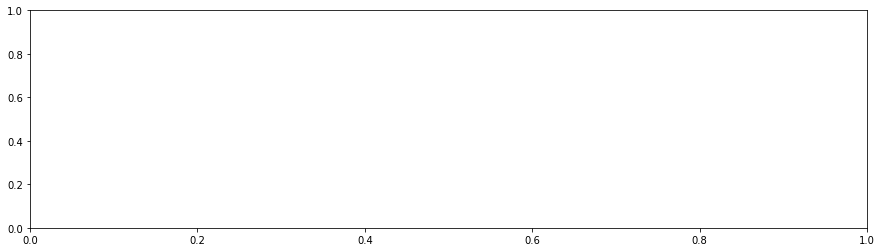

In [ ]:
h_eval = apply_crop_rules(33,73,23,29.23,59.38,5.98,103.33, verbose=1)